# Revealing TCR3b sequence motifs for a specific epitope using attention weights

- Attention 분석을 통해 특정 epitope을 인지하는 TCRb CDR3 서열 모티프를 확인한다

# Experiment 1
- Pre-trained model: BERT-based TAPE model => 12개의 encoder layers
- Fine-tuning rounds:
    - Round 1: 말단 10개의 encoder와 classifier를 Dash, VDJdb, McPAS 데이터를 사용하여 fine-tuning
    - Round 2: 말단 6개 encoder와 classifier를 IEDB SARS-2 데이터를 사용하여 fine-tuning

- Model evaluation
    - COVID-19 S-protein269-277(YLQPRTFLL) with the epitope-specific TCRβs from recent two studies
    - 352 TCRbeta from Shomuradova et al, 415 TCRbeta from ImmuneCODE
    - Attention 분석을 통해 TCR CDR3beta와 에피토프 펩타이드 서열의 모티프를 식별한다.
   

## Global configurations

In [21]:
import logging
import logging.config
import os
import sys
import warnings
from enum import auto
import pandas as pd
import numpy as np
from IPython.core.display import display

rootdir = '/home/hym/trunk/TCRBert'
workdir = '%s/notebook' % rootdir
datadir = '%s/data' % rootdir
srcdir = '%s/tcrbert' % rootdir
outdir = '%s/output' % rootdir

os.chdir(workdir)

sys.path.append(rootdir)
sys.path.append(srcdir)

display(sys.path)

from tcrbert.exp import Experiment
from tcrbert.predlistener import PredResultRecoder


# Display
pd.set_option('display.max.rows', 999)
pd.set_option('display.max.columns', 999)

# Logger
warnings.filterwarnings('ignore')
logging.config.fileConfig('../config/logging.conf')
logger = logging.getLogger('tcrbert')
logger.setLevel(logging.INFO)

# Target experiment
exp_key = 'exp1'
experiment = Experiment.from_key(exp_key)

exp_conf = experiment.exp_conf

display(exp_conf)

['/home/hym/trunk/TCRBert/notebook',
 '/home/hym/trunk/TCRBert/notebook',
 '/home/hym/trunk/epidab',
 '/home/hym/trunk/epidab/epidab',
 '/home/hym/trunk/kvacc',
 '/home/hym/trunk/kvacc/kvacc',
 '/home/hym/trunk/lib',
 '/home/hym/trunk',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/anaconda3/envs/py37-torch/lib/python37.zip',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/lib-dynload',
 '',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/site-packages',
 '/home/hym/anaconda3/envs/py37-torch/lib/python3.7/site-packages/IPython/extensions',
 '/home/hym/.ipython',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/trunk/TCRBert',
 '/home/hym/trunk/TCRBert/tcrbert',
 '/home/hym/trunk/T

2021-09-28 00:14:44 [INFO]: Loaded exp_conf: {'title': 'exp1', 'description': 'Dash, VDJdb, McPAS 데이터로 말단 10개의 encoder와 classifier 학습=>IEDB SARS-2 데이터로 말단 6개 encoder와 classifier 학습', 'paper': 'exp1', 'model_config': '../config/bert-base/', 'train': {'pretrained_model': {'type': 'tape', 'location': '../config/bert-base/'}, 'data_parallel': False, 'rounds': [{'data': 'dash_vdjdb_mcpas', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 150, 'n_workers': 12, 'metrics': ['accuracy'], 'optimizer': {'name': 'adam', 'lr': 0.0001}, 'train_bert_encoders': [-10, None], 'early_stopper': {'monitor': 'accuracy', 'patience': 15}, 'model_checkpoint': {'chk': '../output/exp1/train.0.model_{epoch}.chk', 'monitor': 'accuracy', 'save_best_only': True, 'period': 1}, 'result': '../output/exp1/train.0.result.json'}, {'data': 'iedb_sars2', 'test_size': 0.2, 'batch_size': 128, 'n_epochs': 100, 'n_workers': 12, 'metrics': ['accuracy'], 'optimizer': {'name': 'adam', 'lr': 0.0001}, 'train_bert_encoders': [-6, Non

{'title': 'exp1',
 'description': 'Dash, VDJdb, McPAS 데이터로 말단 10개의 encoder와 classifier 학습=>IEDB SARS-2 데이터로 말단 6개 encoder와 classifier 학습',
 'paper': 'exp1',
 'model_config': '../config/bert-base/',
 'train': {'pretrained_model': {'type': 'tape',
   'location': '../config/bert-base/'},
  'data_parallel': False,
  'rounds': [{'data': 'dash_vdjdb_mcpas',
    'test_size': 0.2,
    'batch_size': 128,
    'n_epochs': 150,
    'n_workers': 12,
    'metrics': ['accuracy'],
    'optimizer': {'name': 'adam', 'lr': 0.0001},
    'train_bert_encoders': [-10, None],
    'early_stopper': {'monitor': 'accuracy', 'patience': 15},
    'model_checkpoint': {'chk': '../output/exp1/train.0.model_{epoch}.chk',
     'monitor': 'accuracy',
     'save_best_only': True,
     'period': 1},
    'result': '../output/exp1/train.0.result.json'},
   {'data': 'iedb_sars2',
    'test_size': 0.2,
    'batch_size': 128,
    'n_epochs': 100,
    'n_workers': 12,
    'metrics': ['accuracy'],
    'optimizer': {'name': 'adam'

## Fine-tuning results

Populating the interactive namespace from numpy and matplotlib
##############################
n_epochs: 150
stopped_epoch: 69
best_epoch: 54
best_score: 0.7856553819444445
best_chk: ../output/exp1/train.0.model_54.chk
##############################
n_epochs: 100
stopped_epoch: 33
best_epoch: 23
best_score: 0.9345262096774194
best_chk: ../output/exp1/train.1.model_23.chk


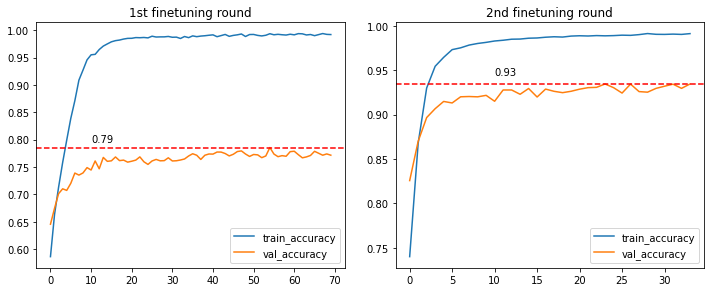

In [40]:
%pylab inline

def show_train_result(train_result=None, ax=None, title=None):
    df = pd.DataFrame({
        'train_loss': train_result['train.score']['loss'],
        'val_loss': train_result['val.score']['loss'],
        'train_accuracy': train_result['train.score']['accuracy'],
        'val_accuracy': train_result['val.score']['accuracy']
    })

    ax = df.loc[:, ['train_accuracy', 'val_accuracy']].plot(ax=ax, title=title, label='best:0.999')
    bs = train_result['best_score']
    ax.axhline(y=bs, ls='--', c='red')
#     ax.annotate('%0.2f' % bs, (10, bs+0.01))
    print('##############################')
    print('n_epochs: %s' % train_result['n_epochs'])
    print('stopped_epoch: %s' % train_result['stopped_epoch'])
    print('best_epoch: %s' % train_result['best_epoch'])
    print('best_score: %s' % train_result['best_score'])
    print('best_chk: %s' % train_result['best_chk'])


fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(4)
plt.tight_layout(h_pad=2, w_pad=2)

show_train_result(train_result=experiment.get_train_result(0), 
                  ax=axes[0], 
                  title='1st finetuning round')
show_train_result(train_result=experiment.get_train_result(1), 
                  ax=axes[1], 
                  title='2nd finetuning round')



## Loading final fine-tuned model

In [29]:
model = experiment.load_eval_model()
display(model)

# Eval result recoder
eval_recoder = PredResultRecoder(output_attentions=True)
model.add_pred_listener(eval_recoder)

2021-09-28 00:26:21 [INFO]: Create TAPE model using config: ../config/bert-base/
2021-09-28 00:26:23 [INFO]: Loading the eval model from ../output/exp1/train.1.model_23.chk


BertTCREpitopeModel(
  (bert): ProteinBertModel(
    (embeddings): ProteinBertEmbeddings(
      (word_embeddings): Embedding(30, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): ProteinBertEncoder(
      (layer): ModuleList(
        (0): ProteinBertLayer(
          (attention): ProteinBertAttention(
            (self): ProteinBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): ProteinBertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm()
              (dropout): Dropout(p=0.1)
            )
     

## Model evaluation and attention motifs

### Shomuradova et al

- Performance evaluation for the dataset containing COVID-19 S-protein269-277(YLQPRTFLL) epitope with the 352 epitope-specific TCRβs from {Shomuradova:2020}
- TCR3b sequence motifs와 attention weights와의 상관관계는?

In [45]:
from torch.utils.data import DataLoader
from tcrbert.dataset import TCREpitopeSentenceDataset

epitope = 'YLQPRTFLL'
metrics = ['accuracy', 'f1', 'roc_auc']

eval_ds = TCREpitopeSentenceDataset.from_key('shomuradova')
eval_data_loader = DataLoader(eval_ds, batch_size=len(eval_ds), shuffle=False, num_workers=2)

model.predict(data_loader=eval_data_loader, metrics=metrics)

2021-09-28 02:04:48 [INFO]: ======================
2021-09-28 02:04:48 [INFO]: Begin predict...
2021-09-28 02:04:48 [INFO]: use_cuda, device: False, cpu
2021-09-28 02:04:48 [INFO]: model: BertTCREpitopeModel(
  (bert): ProteinBertModel(
    (embeddings): ProteinBertEmbeddings(
      (word_embeddings): Embedding(30, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): ProteinBertEncoder(
      (layer): ModuleList(
        (0): ProteinBertLayer(
          (attention): ProteinBertAttention(
            (self): ProteinBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): ProteinBe

2021-09-28 02:04:48 [INFO]: n_data: 610
2021-09-28 02:04:48 [INFO]: batch_size: 610
2021-09-28 02:04:48 [INFO]: Begin 0/1 prediction batch
2021-09-28 02:04:58 [INFO]: End 0/1 prediction batch
2021-09-28 02:04:58 [INFO]: Done to predict...
2021-09-28 02:04:58 [INFO]: ======================


### ROC performance curve

Populating the interactive namespace from numpy and matplotlib
score_map: OrderedDict([('accuracy', 0.9573770491803278), ('f1', 0.9568106312292358), ('roc_auc', 0.9826390755173341)])


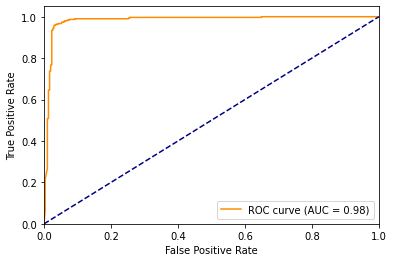

In [52]:
%pylab inline

from sklearn.metrics import roc_curve, auc

input_labels  = np.array(eval_recoder.result_map['input_labels'])
output_labels = np.array(eval_recoder.result_map['output_labels'])
output_probs  = np.array(eval_recoder.result_map['output_probs'])

fpr, tpr, _ = roc_curve(input_labels, output_probs)
score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

print('score_map: %s' % eval_recoder.result_map['score_map'])

### Length distributions of CDR3beta sequences

- Model에 의해 Positive/Negative로 분류된 CDR3beta 서열의 길이 분포를 알아본다

Populating the interactive namespace from numpy and matplotlib
Write fasta for pos_cdr3b seqs.
Write fasta for neg_cdr3b seqs.


Text(0.5, 24.0, 'Length')

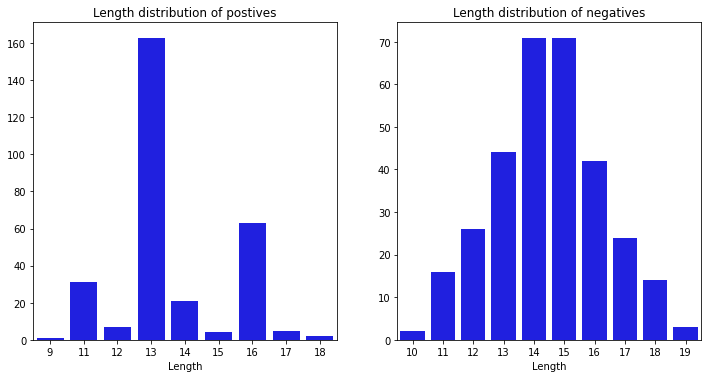

In [57]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as image

import seaborn as sns
from collections import Counter

import numpy as np
from tcrbert.dataset import CN
from tcrbert.bioseq import write_fa

eval_df = eval_ds.df_enc

pos_indices = np.where(output_labels == 1)[0]
neg_indices = np.where(output_labels == 0)[0]

# print('pos_indices: %s(%s)' % (pos_indices, str(pos_indices.shape)))
# print('neg_indices: %s(%s)' % (neg_indices, str(neg_indices.shape)))

pos_cdr3b = eval_df[CN.cdr3b].values[pos_indices]
neg_cdr3b = eval_df[CN.cdr3b].values[neg_indices]

write_fa('../output/shomuradova.pos_cdr3b.fa', pos_cdr3b)
print('Write fasta for pos_cdr3b seqs.')

write_fa('../output/shomuradova.neg_cdr3b.fa', neg_cdr3b)
print('Write fasta for neg_cdr3b seqs.')

##########################################
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout(h_pad=1, w_pad=3)

lens, cnts = zip(*sorted(Counter(map(lambda x: len(x), pos_cdr3b)).items()))
ax = sns.barplot(x=list(lens), y=list(cnts), ax=axes[0], color='blue')
ax.set_title('Length distribution of postives')
ax.set_xlabel('Length')

lens, cnts = zip(*sorted(Counter(map(lambda x: len(x), neg_cdr3b)).items()))
ax = sns.barplot(x=list(lens), y=list(cnts), ax=axes[1], color='blue')
ax.set_title('Length distribution of negatives')
ax.set_xlabel('Length')

# pos_slogo = image.imread('../output/shomuradova.pos_cdr3b_seqlogo.jpeg')
# axes[1][0].set_title('SeqLogo for positive MSA')
# axes[1][0].set_axis_off()
# axes[1][0].imshow(pos_slogo, aspect='equal')

# neg_slogo = image.imread('../output/shomuradova.neg_cdr3b_seqlogo.jpeg')
# axes[1][1].set_title('SeqLogo for negative MSA')
# axes[1][1].set_axis_off()
# axes[1][1].imshow(neg_slogo, aspect='equal')

- Length distribution
    - Positive의 경우, 대부분의 서열 길이는 13이고 뒤를 이어 16, 11에 몰려 있다
    - Negative의 경우, 11-18 길이로 골고루 분포되어 있으며, 14, 15에 가장 많이 있다.  

<strike>
- MSA
    - Positive의 경우, 1-3번 위치에 C, A, <b>8번 위치에 P</b>, 16-20번 위치에 E, F가 모티프
    - Negative의 경우, 1-3번 위치에 C, A, 4, 5번 위치에 S, 18-21번 위치에 각각 E, Q, F, 22-25번에 P, Q, H, F가 모티프

- Positive/negative MSA 간의 모티프 차이점
    - 앞단 위치의 모티프 구성: pos=>CCA, neg=>CCASS
    - Positive MSA의 8번 위치의 P
    - 말단 위치에서의 positive의 경우 E, F로 모티프가 구성되는 반면, negative의 경우 E, Q, F로 구성되는 점
    - Positive MSA에서는 나타나지 않은 negative의 최말단에 P, Q, H, F로 구성되는 모티프가 있음
</strike>

### Investigation of attention weights in YLQPRTFLL-CDR3b sequences 
- Epitope-specific TCR 상호작용에서의 위치 특이적 모티프들을 알아내기 위해 보통 TCR 서열들의 MSA 상에서 highly-conserved 위치들을 모티프로 본다. 

- YLQPRTFLL 에피토프와 TCR 상호작용에서의 위치특이적 아미노산 기여도를 알아내기 위해서 positive 데이터셋의 epitope-CDR3beta 서열 상에서 우리의 모델에 의해 캡쳐되는 attention weight를 조사하였다.
- BERTology는 TAPE, ProtAlbert 등과 같은 protein Transformer 모델의 output attention을 분석을 통하여 단백질 접힘 구조와 단백질 목표 결합 사이트 등을 효과적으로 캡쳐할 수 있음을 보였다{Vig, J:2020}
- Epitope-specific TCR 인지에서의 기존의 서열 기반의 모티프 분석 방법들은 TCR 서열들만을 대상으로 highly conserved 위치들을 대상으로 하기 때문에 epitope 펩타이드 서열 상의 모티프를 식별하는 것은 어려웠다. 
- 그러나, 여기서 제시하고 있는 방법은 epitope 펩타이드 서열과 TCR 서열 모두 동시에 고려하기 때문에 더욱 유용하다. 

Transformer architectures have proven to learn useful representations for protein classification and generation tasks. However, these representations present challenges in interpretability. In this work, we demonstrate a set of methods for analyzing protein Transformer models through the lens of attention. We show that attention: (1) captures the folding structure of proteins, connecting amino acids that are far apart in the underlying sequence, but spatially close in the three-dimensional structure, (2) targets binding sites, a key functional component of proteins, and (3) focuses on progressively more complex biophysical properties with increasing layer depth. We find this behavior to be consistent across three Transformer architectures (BERT, ALBERT, XLNet) and two distinct protein datasets. We also present a three-dimensional visualization of the interaction between attention and protein structure. Code for visualization and analysis is available at this https URL.

Populating the interactive namespace from numpy and matplotlib
attentions.shape: (12, 610, 12, 40, 40)
pos_attns.shape: (12, 297, 12, 40, 40), neg_attns.shape: (12, 313, 12, 40, 40)
sub_pos_attns.shape: (6, 28), sub_neg_attns.shape: (6, 29)


<AxesSubplot:xlabel='Position', ylabel='Layer'>

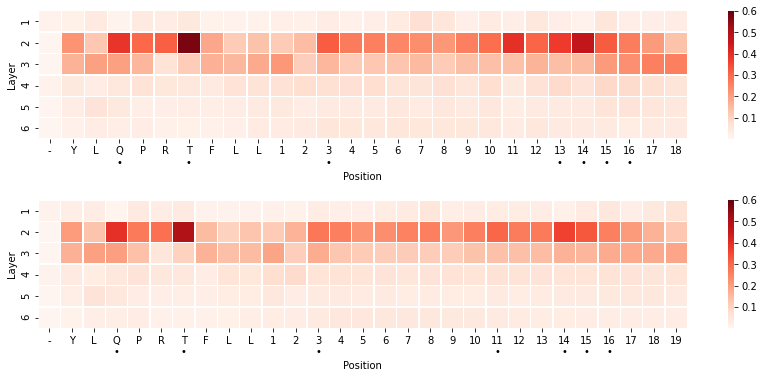

In [73]:
%pylab inline

import numpy as np
from tcrbert.dataset import CN
from tcrbert.bioseq import write_fa

def show_attentions(attns=None, ax=None, mark_top_rank=None):
    g = sns.heatmap(attns, ax=ax, linewidths=.4, cmap='Reds', vmax=0.6, cbar=True)
    g.set_xlabel('Position')
    xt_labels = ['-'] + list(epitope) + \
                list(range(1, attns.shape[1] - len(epitope)))
    
    if mark_top_rank:
        for rank, pos in enumerate(np.argsort(attns.mean(axis=0))[::-1]):
            if rank < mark_top_rank:
                xt_labels[pos] = '%s\n•' % (xt_labels[pos])
            
    g.set_xticklabels(xt_labels)    
    g.set_ylabel('Layer')
    g.set_yticklabels(range(1, attns.shape[0] + 1))
    return g

n_layers = model.config.num_hidden_layers
n_data = len(eval_ds)
n_heads = model.config.num_attention_heads
max_len = eval_ds.max_len

attentions = eval_recoder.result_map['attentions']
# attentions.shape: (n_layers, n_data, n_heads, max_len, max_len)
print('attentions.shape: %s' % str(attentions.shape))

pos_attns = attentions[:, pos_indices]
neg_attns = attentions[:, neg_indices]
print('pos_attns.shape: %s, neg_attns.shape: %s' % (str(pos_attns.shape), str(neg_attns.shape)))

fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(12)
fig.set_figheight(5)
plt.tight_layout(h_pad=4)

max_pos = 1 + len(epitope) + max(map(lambda x: len(x), pos_cdr3b))
sub_pos_attns = np.median(pos_attns[-6:, :, :, :max_pos,  0], axis=(1, 2))
max_pos = 1 + len(epitope) + max(map(lambda x: len(x), neg_cdr3b))
sub_neg_attns = np.median(neg_attns[-6:, :, :, :max_pos,  0], axis=(1, 2))

print('sub_pos_attns.shape: %s, sub_neg_attns.shape: %s' % (str(sub_pos_attns.shape), str(sub_neg_attns.shape)))
show_attentions(attns=sub_pos_attns, ax=axes[0], mark_top_rank=7)
show_attentions(attns=sub_neg_attns, ax=axes[1], mark_top_rank=7)


#### Results
- YLQPRTFLL 에피토프의 4번 위치의 P에 매우 높은 attention 가중치가 나왔다. 이는 TCR-epitope 상호작용에 있어 4번 위치의 P가 매우 중요한 역할을 한다는 것을 보여 준다.
- 2021.6월에 medRxiv preprint로 공개된 {Garry Dolton:2021}에 따르면 spike protein에서의 P272L 변이는 영국의 2차 대유행과 연관이 있음이 밝혀졌다. P272L 변이는 완치된 환자의 T-Cell 대응을 무력화 시키고, 따라서 기존 COVID-19 백신으로 T-Cell 면역이 활성화된 대조군에서 P272L 변이 펩타이드를 인지하지 못하는 것으로 밝혀졌다(https://www.news-medical.net/news/20210629/Widespread-SARS-CoV-2-mutation-escapes-vaccine-and-infection-induced-CD8-T-cell-responses.aspx).
- 자 그럼, P4와 높은 상호작용을 하는 TCR 서열의 잔기 위치는 어디일까? 이는 TCR 서열 위치에서의 attention 가중치가 높은 위치일 것이다. 
- TCR 서열에서 Attention weight가 상대적으로 높은 곳은 1, 8, 14, 15, 17, 18번이다. 이는 MSA seqlogo에서 보는 바와 같이 Gap을 고려하지 않는다면 대부분 highly conserved된 모티프 부위와 거의 일치한다.
- 특히, negative MSA와 극명하게 차이나는 모티프인 8번 위치는 높은 attention weight를 보이는 것으로 나타났다.


## ImmuneCODE

-  The dataset contained 415 COVID-19 S-protein269-277-specific TCRs from the ImmuneRACE study launched by Adaptive Biotechnologies and Microsoft (https://immunerace.adaptivebiotech.com, June 10, 2020 dataset, from hereon referred to as ImmuneCODE dataset
- TCR3b sequence motifs와 attention weights와의 상관관계는?

In [74]:
from torch.utils.data import DataLoader
from tcrbert.dataset import TCREpitopeSentenceDataset

eval_ds = TCREpitopeSentenceDataset.from_key('immunecode')
eval_data_loader = DataLoader(eval_ds, batch_size=len(eval_ds), shuffle=False, num_workers=2)

model.predict(data_loader=eval_data_loader, metrics=metrics)

2021-09-28 03:41:01 [INFO]: ======================
2021-09-28 03:41:01 [INFO]: Begin predict...
2021-09-28 03:41:01 [INFO]: use_cuda, device: False, cpu
2021-09-28 03:41:01 [INFO]: model: BertTCREpitopeModel(
  (bert): ProteinBertModel(
    (embeddings): ProteinBertEmbeddings(
      (word_embeddings): Embedding(30, 768, padding_idx=0)
      (position_embeddings): Embedding(8192, 768)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm()
      (dropout): Dropout(p=0.1)
    )
    (encoder): ProteinBertEncoder(
      (layer): ModuleList(
        (0): ProteinBertLayer(
          (attention): ProteinBertAttention(
            (self): ProteinBertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1)
            )
            (output): ProteinBe

2021-09-28 03:41:01 [INFO]: n_data: 765
2021-09-28 03:41:01 [INFO]: batch_size: 765
2021-09-28 03:41:01 [INFO]: Begin 0/1 prediction batch
2021-09-28 03:41:32 [INFO]: End 0/1 prediction batch
2021-09-28 03:41:33 [INFO]: Done to predict...
2021-09-28 03:41:33 [INFO]: ======================


### ROC performance curve

Populating the interactive namespace from numpy and matplotlib
score_map: OrderedDict([('accuracy', 0.9633986928104575), ('f1', 0.9622641509433962), ('roc_auc', 0.9859417808219179)])


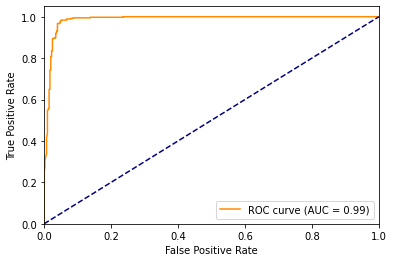

In [75]:
%pylab inline

from sklearn.metrics import roc_curve, auc

input_labels  = np.array(eval_recoder.result_map['input_labels'])
output_labels = np.array(eval_recoder.result_map['output_labels'])
output_probs  = np.array(eval_recoder.result_map['output_probs'])

fpr, tpr, _ = roc_curve(input_labels, output_probs)
score = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

print('score_map: %s' % eval_recoder.result_map['score_map'])

### Length distributions of TCR CDR3b sequences

Populating the interactive namespace from numpy and matplotlib
Write fasta for pos_cdr3b seqs.
Write fasta for neg_cdr3b seqs.


Text(0.5, 24.0, 'Length')

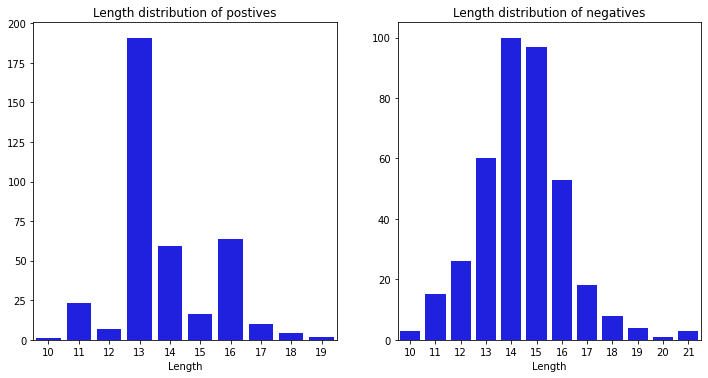

In [76]:
%pylab inline

import matplotlib.pyplot as plt
import matplotlib.image as image

import seaborn as sns
from collections import Counter

import numpy as np
from tcrbert.dataset import CN
from tcrbert.bioseq import write_fa

eval_df = eval_ds.df_enc

pos_indices = np.where(output_labels == 1)[0]
neg_indices = np.where(output_labels == 0)[0]

# print('pos_indices: %s(%s)' % (pos_indices, str(pos_indices.shape)))
# print('neg_indices: %s(%s)' % (neg_indices, str(neg_indices.shape)))

pos_cdr3b = eval_df[CN.cdr3b].values[pos_indices]
neg_cdr3b = eval_df[CN.cdr3b].values[neg_indices]

write_fa('../output/immunecode.pos_cdr3b.fa', pos_cdr3b)
print('Write fasta for pos_cdr3b seqs.')

write_fa('../output/immunecode.neg_cdr3b.fa', neg_cdr3b)
print('Write fasta for neg_cdr3b seqs.')

##########################################
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(10)
fig.set_figheight(5)
plt.tight_layout(h_pad=1, w_pad=3)

lens, cnts = zip(*sorted(Counter(map(lambda x: len(x), pos_cdr3b)).items()))
ax = sns.barplot(x=list(lens), y=list(cnts), ax=axes[0], color='blue')
ax.set_title('Length distribution of postives')
ax.set_xlabel('Length')

lens, cnts = zip(*sorted(Counter(map(lambda x: len(x), neg_cdr3b)).items()))
ax = sns.barplot(x=list(lens), y=list(cnts), ax=axes[1], color='blue')
ax.set_title('Length distribution of negatives')
ax.set_xlabel('Length')

### Investigation of attention weights

Populating the interactive namespace from numpy and matplotlib
attentions.shape: (12, 765, 12, 40, 40)
pos_attns.shape: (12, 377, 12, 40, 40), neg_attns.shape: (12, 388, 12, 40, 40)
sub_pos_attns.shape: (6, 29), sub_neg_attns.shape: (6, 31)


<AxesSubplot:xlabel='Position', ylabel='Layer'>

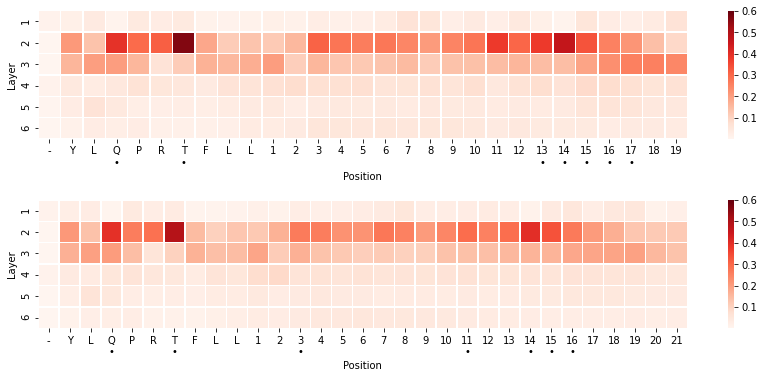

In [87]:
%pylab inline

import numpy as np
from tcrbert.dataset import CN
from tcrbert.bioseq import write_fa

n_layers = model.config.num_hidden_layers
n_data = len(eval_ds)
n_heads = model.config.num_attention_heads
max_len = eval_ds.max_len

attentions = eval_recoder.result_map['attentions']
# attentions.shape: (n_layers, n_data, n_heads, max_len, max_len)
print('attentions.shape: %s' % str(attentions.shape))

pos_attns = attentions[:, pos_indices]
neg_attns = attentions[:, neg_indices]


print('pos_attns.shape: %s, neg_attns.shape: %s' % (str(pos_attns.shape), str(neg_attns.shape)))
fig, axes = plt.subplots(nrows=2, ncols=1)
fig.set_figwidth(12)
fig.set_figheight(5)
plt.tight_layout(h_pad=4)

max_pos = 1 + len(epitope) + max(map(lambda x: len(x), pos_cdr3b))
sub_pos_attns = np.median(pos_attns[-6:, :, :, :max_pos,  0], axis=(1, 2))
max_pos = 1 + len(epitope) + max(map(lambda x: len(x), neg_cdr3b))
sub_neg_attns = np.median(neg_attns[-6:, :, :, :max_pos,  0], axis=(1, 2))

print('sub_pos_attns.shape: %s, sub_neg_attns.shape: %s' % (str(sub_pos_attns.shape), str(sub_neg_attns.shape)))


show_attentions(attns=sub_pos_attns, ax=axes[0], mark_top_rank=7)
show_attentions(attns=sub_neg_attns, ax=axes[1], mark_top_rank=7)


- Shomuradova 데이터셋의 결과와 마찬가지로, YLQPRTFLL 에피토프의 4번 위치의 P에 매우 높은 attention 가중치가 나왔다. 이는 TCR 분자가 에피토프를 인지하여 T-Cell 면역 대응을 유도하는 데 있어 에피토프의 4번 위치의 P가 매우 중요한 역할을 한다는 것을 보여 준다.
- 몇달전에 {Garry Dolton:2021} 연구에서 보고된 바에 따르면 spike protein에서의 P272L 변이는 영국의 2차 대유행과 연관이 있음이 밝혀졌다. P272L 변이는 완치된 환자의 T-Cell 대응을 무력화 시키고 백신에 대한 면역 회피를 야기하는 것으로 알려졌다.
- 자 그럼, 에피토와와 높은 상호작용을 하는 TCR 서열의 잔기 위치는 어디일까? 이는 TCR 서열 위치에서의 attention 가중치가 높은 위치일 것이다. 
- TCR 서열에서 Attention weight가 상대적으로 높은 곳은 Shomuradova 데이터셋의 결과와 마찬가지로 1, 8, 14, 15, 17, 18번이다. 이는 MSA seqlogo에서 보는 바와 같이 Gap을 고려하지 않는다면 대부분 highly conserved된 모티프 부위와 어느 정도 일치하지만 Shomuradova 데이터셋만큼은 아니다. 
- 이것으로 볼때, 에피토프와 높은 상호작용을 하는 TCR 서열 잔기 위치를 파악하는 데 있어 MSA 기반으로 conserved 모티프로부터 추론하는 방법도 전통적으로 유용하지만 attention weight로부터 유추하는 것이 더욱 심플하고 효과적일 수 있다는 것을 알 수 있다.